In [2]:
#Imports

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math

In [6]:
# Model Architechture

def modelv1(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a CNN 
    
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        

    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),
    Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False), 
    BatchNormalization(name = 'batchnorm_1'),
        
   
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    

    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),
        
    Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),
        
    BatchNormalization(name = 'batchnorm_2'),
        
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),

        
    Dense(units = 256, name = 'fully_connected_1', use_bias=False),
        

    BatchNormalization(name = 'batchnorm_3'),
    

    Activation("relu"),

        
    Dense(units = 128, name = 'fully_connected_2', use_bias=False),
        

    BatchNormalization(name = 'batchnorm_4'),
        

    Activation("relu"),

        

    Dense(units = 84, name = 'fully_connected_3', use_bias=False),
        

    BatchNormalization(name = 'batchnorm_5'),
        
 
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),
    

    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'modelv1'

    return model

In [8]:
# Model shape

LeNet5Model = modelv1(input_shape = (32, 32, 1), classes = 10)

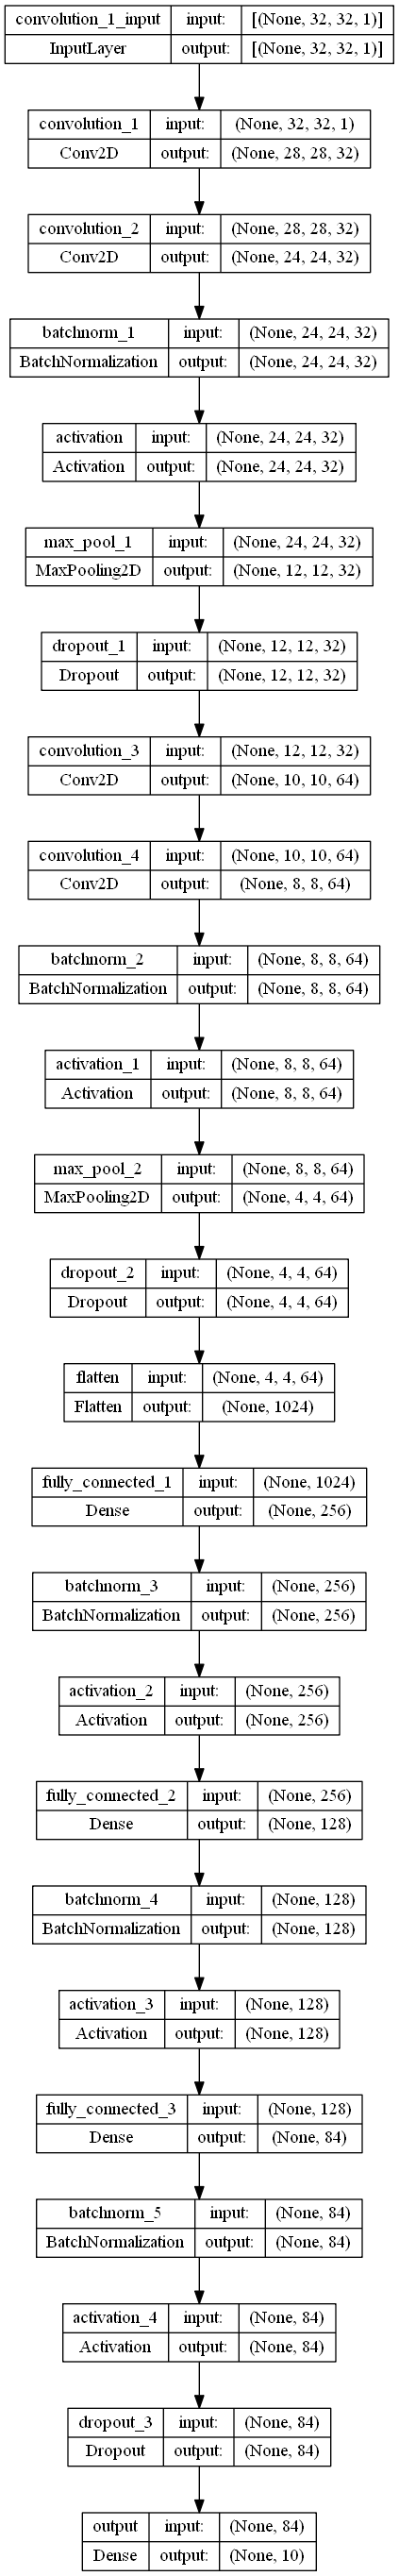

In [9]:
# Plot Model



tf.keras.utils.plot_model(
    LeNet5Model,
    show_shapes=True,
    show_layer_names=True,
)




In [10]:
# Compile

LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train = pd.read_csv('C:\\Users\\miepp\\OneDrive\\Desktop\\Boken_och_uppgiften\\Szandra_streamlit\\Predict_MNIST-main\\Data\\train.csv')
test = pd.read_csv('C:\\Users\\miepp\\OneDrive\\Desktop\\Boken_och_uppgiften\\Szandra_streamlit\\Predict_MNIST-main\\Data\\test.csv')
#train = pd.read_csv('C:\\Users\\miepp\\OneDrive\\Desktop\\Boken_och_uppgiften\\jaqi_streamlit\\streamlit-mnist-drawable-dev\\Data\\Emnist\\train.csv')
#test = pd.read_csv('C:\\Users\\miepp\\OneDrive\\Desktop\\Boken_och_uppgiften\\jaqi_streamlit\\streamlit-mnist-drawable-dev\Data\Emnist\\test.csv')


Y = train[['label']]
X = train.drop(train.columns[[0]], axis=1)

X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print("Size of Dataset: " , len(X))

cross_validation_size = int(len(X)*0.05)

print("Size of Cross Validation Set: " , cross_validation_size)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = cross_validation_size, random_state=random_seed)

X_test = test



Size of Dataset:  42000
Size of Cross Validation Set:  2100


In [12]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Padding the images by 2 pixels (LeNet5 paper uses 32x32)
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val - mean_px)/(std_px)

mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test - mean_px)/(std_px)

# One-hot encoding the labels
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)

In [13]:
# Imagedatagenerator   

datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

In [14]:
#Learning rate

variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [15]:
# Model training

history = LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data = (X_val,Y_val))

Epoch 1/30
624/624 [==============================] - 44s 69ms/step - loss: 0.2535 - accuracy: 0.9339 - val_loss: 0.0732 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 2/30
624/624 [==============================] - 44s 70ms/step - loss: 0.0939 - accuracy: 0.9784 - val_loss: 0.0607 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 3/30
624/624 [==============================] - 44s 71ms/step - loss: 0.0763 - accuracy: 0.9823 - val_loss: 0.0460 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 4/30
624/624 [==============================] - 45s 73ms/step - loss: 0.0617 - accuracy: 0.9858 - val_loss: 0.0640 - val_accuracy: 0.9848 - lr: 0.0010
Epoch 5/30
624/624 [==============================] - 43s 68ms/step - loss: 0.0571 - accuracy: 0.9866 - val_loss: 0.0389 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 6/30
624/624 [==============================] - 43s 68ms/step - loss: 0.0508 - accuracy: 0.9882 - val_loss: 0.0418 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 7/30
624/624 [==============================] - 43s 

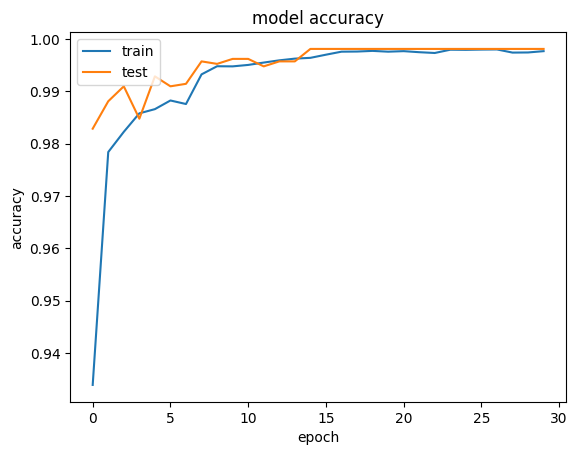

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

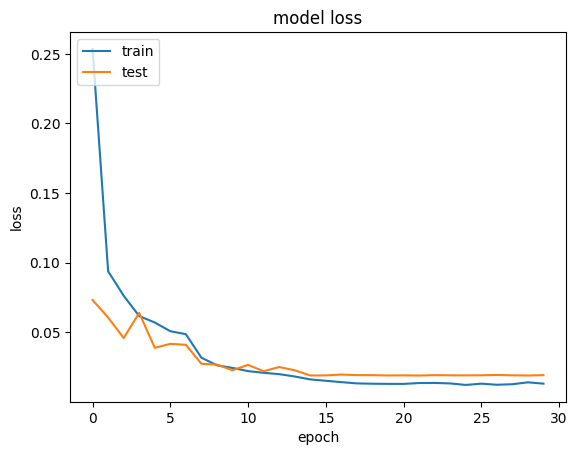

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Save diagnostic learning curves 

def summarize_diagnostics(history):
 # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
 
pyplot.close()
 

In [21]:
# Save Results

results = LeNet5Model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

875/875 [==============================] - 6s 7ms/step


In [22]:
# Submission

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("LeNetv2.csv",index=False)

In [23]:
# Save model

LeNet5Model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [ ]:
loss: 0.0132 - accuracy: 0.9977 - val_loss: 0.0193 - val_accuracy: 0.9981